# Videos and Exercises for Session 2B: Data Structuring in Pandas

In this combined teaching module and exercise set you will be working with structuring data. 

We will start out with some material about how write readable code. 

Then we will focus on data cleaning, in particular working with pandas data types and new data types:
1. String  data
1. Categorical data
1. Temporal data
1. Missing data and duplicates

## Packages
Load in the required modules and set up the plotting library:

In [77]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo

# Part 1: Welcome (Back to) Pandas

As mentioned during the lecture, data structuring skills are necessary to become a great data scientist. There is no way around it.

Let's start with the basics. In the first video, we start out by talking about the fundamentals of Pandas: 
- The Pandas DataFrame and the Pandas Series. 
- We then proceed and discuss how indices and colums can be named and selected. 
- Finally, we make some simple operations.

**NOTE:** This is mainly repitition of what you already worked with in assignment 0. If you feel comfortable with this, you should proceed to the associated exercises that will get you warmed up for the rest of this notebook.

# VIDEO 1

## Exercises for Video 1

In this set of introductory exercises, we are going to briefly touch upon some of the tools from the video. Again, be aware that there is going to be some repition of the content from assignment 0 here - but these things are all very useful to get under your skin!

> **Ex. 4.1.1**: Run the following two lines below. Explain what the second line did, and how each entry affected it. In relation to this, what did the first line ensure? When can this be useful? Try and play around with the seed.

In [78]:
np.random.seed(seed=161193)
np_arr=np.round(np.random.exponential(10, size=(10**5,3)),0)

Now, we want you to investigate how easy it is to go from a numpy `array` to a pandas `series`. You are going to do this repeatedly in this course!

> **Ex. 4.1.2**: Generate a Pandas DataFrame called `my_df` from `np_arr`:

In [119]:
### BEGIN SOLUTION
my_df = pd.DataFrame(np_arr)
### END SOLUTION

my_df

,0,1,2
0,5.0,0.0,2.0
1,4.0,7.0,20.0
2,1.0,4.0,2.0
3,3.0,9.0,4.0
4,5.0,2.0,13.0
...,...,...,...
99995,2.0,7.0,14.0
99996,5.0,3.0,7.0
99997,1.0,25.0,5.0
99998,1.0,47.0,6.0


Before we continue working with this DataFrame, we want to make sure that you are capable of transforming them back to different types of containers. This is another very fundamental tool in your data science toolbox.

> **Ex. 4.1.3**: In the following cell, generate an `array`, a `list` of lists and a `dict` from `my_df`. You should be able to do each of these things in one line. Verify that you did this properly by printing your output.

In [120]:
### BEGIN SOLUTION
my_arr = my_df.values
my_dict = my_df.to_dict()
my_list = my_df.values.tolist()
### END SOLUTION

A noticable distiction between pandas dataframes and, say, numpy arrays is the option to label indices and (in particular) columns. This is helpful when working with large sets of data.

> **Ex. 4.1.4**: Going back to the DataFrame `my_df`, we now want you to try the following: 
> 1. Label the columns 'apples', 'bananas' and 'oranges'
> 2. Change the indices to 'cust**x***' where **x** is a sequential numering of the lines starting from 1 (*hint:* There are many ways to do this, e.g. with a list comprehension!)
> 3. Print the first 10 observations using the `head()` approach

In [121]:
### BEGIN SOLUTION
cols = ['Apples', 'Bananas', 'Oranges']

indx = []
[indx.append('cust{a}'.format(a=i+1)) for i in range(len(my_df))]

my_df.columns, my_df.index = cols, indx

my_df.head(10)
### END SOLUTION

,Apples,Bananas,Oranges
cust1,5.0,0.0,2.0
cust2,4.0,7.0,20.0
cust3,1.0,4.0,2.0
cust4,3.0,9.0,4.0
cust5,5.0,2.0,13.0
cust6,2.0,6.0,0.0
cust7,12.0,16.0,14.0
cust8,30.0,5.0,18.0
cust9,21.0,0.0,2.0
cust10,11.0,14.0,1.0


As we saw in the video, we can basically generate a pandas series from a pandas dataframe by simply selecting one column from the dataframe and storing it as a new object.

> **Ex. 4.1.5**: Now, we want you to generate a series and inspect the output a bit:
> 1. Generate a series by only selecting 'apples', and store it as 'apples_ser'. Try using the key-based method and the object-based method, respectively. 
> 2. Check the data type. Thinking about our first lines of code, why is it not an `integer`? Convert both 'apples_ser' and 'my_df' to intergers.

In [122]:
### BEGIN SOLUTION
apples_ser = my_df['Apples']
apples_ser = my_df.Apples

apples_ser = apples_ser.astype(int)
my_df = my_df.astype(int)
### END SOLUTION

# VIDEO 2: Simple Data Types - Boolean Series

## Exercises for Video 2

Boolean data is the simplest data type that we work with. These variables are binary, and basically represent a True or False value. As seen in the video, they become particularly useful when we only want to work with certain rows in a dataframe.

> **Ex. 4.1.6**: Drop all rows for which 'Apples' is strictly smaller than 5.

In [123]:
### BEGIN SOLUTION
my_df = my_df[my_df['Apples']>=5]
my_df
### END SOLUTION

,Apples,Bananas,Oranges
cust1,5,0,2
cust5,5,2,13
cust7,12,16,14
cust8,30,5,18
cust9,21,0,2
...,...,...,...
cust99989,5,31,16
cust99990,9,11,2
cust99991,37,17,2
cust99992,7,3,19


# VIDEO 3: Simple Data Types - Numeric Data

## Exercises for Video 3

As we saw in the video, we can easily make vectorized operations with multiple arrays as well as pandas series and dataframes. This feature can become useful in many cases - in particular, when you have a large set of data and do not want to make a (computationally exhaustive) loop through all you operations.

> **Ex. 4.1.7**: In this exercise, we want you to make operations on multiple vectors and matrices using a combination of numpy arrays and pandas dataframes.
> 1. Generate 1x3 numpy array with costs of different types of fruits. Call this 'price'. Entries should be 1, 4 and 3.
> 2. Generate a new dataframe with information on each costumer's expenses associated with each type of fruit. This should involve multiplying your cost array with the fruit dataframe.
> 3. Generate a new column called 'Total expenditure' by summing over fruit-specific prices for each customer (*hint:* Learn more about such sum [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)).
> 4. Sort the dataframe by total expenditure, starting with the customer with highest expenditure.

In [159]:
### BEGIN SOLUTION
price = np.array([1, 4, 3])
exp_df = my_df*price
exp_df['Total expenditure'] = exp_df.sum(axis=1)
exp_df.sort_values(by='Total expenditure', ascending=False, inplace=True)
exp_df
### END SOLUTION

,Apples,Bananas,Oranges,Total expenditure
cust2459,14,368,180,562
cust12385,9,372,150,531
cust50360,31,300,171,502
cust66559,22,332,93,447
cust36884,44,204,195,443
...,...,...,...,...
cust45372,5,0,0,5
cust12524,5,0,0,5
cust4308,5,0,0,5
cust70191,5,0,0,5


When we have a large data set, it is difficult to get an idea of it's characteristics by simply sorting and printing. In such cases, we much rather want to look at some kinds of descriptive statistics for our data. 

> **Ex. 4.1.8**: In this exercise, we will ask you to use two methods from the video in order to shed some light on the distribution of total expenditure:
> 1. Use `describe()` to get an idea about the distribution of total expenditure in the data set. What does the distance between `mean` and `50%` tell you about the skewness?
> 2. Use the `cut` method to split the sample into 6 equal sized bins of expenditures from 0 to 600. Find the *share* of observations within each of these bins (we will work more with *categorical data* later in this session).

In [158]:
### BEGIN SOLUTION
np.round(exp_df['Total expenditure'].describe(),2)

cuts = np.arange(0,700, 100) # range from -10 to 10 with intervals of unit size
cats = pd.cut(exp_df['Total expenditure'], cuts)
cats.value_counts()/exp_df['Total expenditure'].count()
### END SOLUTION

(0, 100]      0.705860
(100, 200]    0.262011
(200, 300]    0.029513
(300, 400]    0.002350
(400, 500]    0.000219
(500, 600]    0.000047
Name: Total expenditure, dtype: float64

# VIDEO 4: Simple Data Types - String Data

## Exercises for Video 4

Finally, we saw that there is a set of string-specific operations (`.str`) that can be applied to a whole pandas series without having to loop through each row.

> **Ex. 4.1.9**: In this final introductory exercise, we want you to 
> 1. generate a new variable based on the index called 'Customer'. This should capitalize the customer id and write out 'Cust' to 'Customer' (i.e. you should get something similar to 'Customer **x**'). 
> 2. Reset the index.

In [146]:
### BEGIN SOLUTION
exp_df['Customer'] = exp_df.index.str[0:4] + 'omer ' + exp_df.index.str[4:]
exp_df['Customer'] = exp_df['Customer'].str.capitalize()
exp_df.reset_index(drop=True)
### END SOLUTION

,Apples,Bananas,Oranges,Total expenditure,Customer
0,14,368,180,562,Customer 2459
1,9,372,150,531,Customer 12385
2,31,300,171,502,Customer 50360
3,22,332,93,447,Customer 66559
4,44,204,195,443,Customer 36884
...,...,...,...,...,...
63832,5,0,0,5,Customer 45372
63833,5,0,0,5,Customer 12524
63834,5,0,0,5,Customer 4308
63835,5,0,0,5,Customer 70191


# Part 2: Readible Code

Before proceeding to part 3 on advanced data types, we want you to think a bit about writing readable code. In particular, if we have lots of code, it may be very difficult for others or ourselves to read. Therefore, providing some structure and meta text can help reading the code.

In the following, you will learn about readible code. Then we ask you to use what you learned in order to process the NOAA data from assignment 0. Don't spend too long on this exercise - we are going to use the data for the following exercises.

## Commenting

When making code it's good practice to document different parts of the code. In particular describing functions and complex code. The example below shows how to make multi-line comments (as a string, which is not assigned) and in-line comments using the `#` character.

```python
def my_fct(x,y):
    ''' 
    Computes the sum of input values (multi-line comment as string)
    '''
    z = x+y # Here we perform the summation (in-line comment)
    return z
```


## Method chaining

We can write multiple operations together by putting them one after the other, which is known as `method chaining`. Using this, we only need to assign them once to a new object and therefore we save a lot of code. We change the example below into one using a method chain:

Example without method chain
```python
df_temp1 = df.loc[selection]
df_temp2 = df_temp1.sort_values(by=X)
df_out = df_temp2.reset_index()
```

Example with method chain - one line

```python
df_out = df.loc[selection].sort_values(by=X).reset_index()
```
As seen in the example, although using less code, our method chain will get more and more difficult to read if we include two or more operations. We can overcome this problem of long chains by splitting into multiple lines with line breaks:

Example with method chain - line break
```python
df_out = df\
        .loc[selection]\
        .sort_values(by=X)\
        .reset_index()
```

Note that the backslash allows us to make a visual line break, but the code is read as one line.


## Exercises for Part 2

We continue with the exercise that analyzes NOAA data. The first part was Assignment Part 0.4. The last part will come in Exercise Section 5.2. We start out reviewing what we did in Assignment 0. 

> **Ex. 4.2.1:** The code below runs through all the steps we completed in Assignment 0.4 step by step. Your task is to document this code in your own words. You should also make your own annotation of parts. You should also make the code more readable by applying method chaining (*hint:* After loading the data and selecting the first four columns, everything can be stated in one method chain!)

```python
import pandas as pd

def load_weather(year):
    
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"

    df_weather = pd.read_csv(url, 
                             header=None)        

    df_weather = df_weather.iloc[:,:4] 
    
    column_names = ['station', 'datetime', 'obs_type', 'obs_value']
    df_weather.columns = column_names 
    
    df_weather['obs_value'] = df_weather['obs_value'] / 10 
    
    selection_tmax = df_weather.obs_type == 'TMAX'
    df_select = df_weather.loc[selection_tmax]
    
    df_sorted = df_select.sort_values(by=['station', 'datetime'])
    df_reset = df_sorted.reset_index(drop=True)
    df_out = df_reset.copy()
            
    return df_out
```

In [160]:
### BEGIN SOLUTION

import pandas as pd # Import pandas package

def load_weather(year):
    
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"

    # Load the data
    df_weather = pd.read_csv(url, header=None)\
                             .iloc[:,:4]
    
    # Structure and clean data using methods chaining
    df_out = df_weather\
                .rename(columns = {0: 'station', 1: 'datetime', 2: 'obs_type', 3: 'obs_value'})\
                .query("obs_type == 'TMAX'")\
                .assign(obs_value = lambda df: df['obs_value']/10)\
                .sort_values(by=['station', 'datetime'])\
                .reset_index(drop=True)\
                .copy()
    
    return df_out

### END SOLUTION

load_weather(1863)

,station,datetime,obs_type,obs_value
0,AGE00135039,18630102,TMAX,11.5
1,AGE00135039,18630103,TMAX,11.0
2,AGE00135039,18630105,TMAX,15.5
3,AGE00135039,18630106,TMAX,16.5
4,AGE00135039,18630107,TMAX,15.0
...,...,...,...,...
5875,USW00014838,18630727,TMAX,20.6
5876,USW00014838,18630728,TMAX,19.9
5877,USW00014838,18630729,TMAX,25.1
5878,USW00014838,18630730,TMAX,29.4


# Part 3: Advanced Data Types

When you start working with data, you quickly realize that data comes in many different types. 

Some distinctions between data types are obvious to make. For instance, numeric variables should consists of meaningful values that represent something that can be measured (a length, weight, economic value, etc.) with a number. String variables, on the other hand, are variables that *may* also consist of letters and other characters in addition to numbers. And boolean variables are simply binary with only two possible values.

However, we also encounter lots of other data types in applied work within social sciences. Categorical variables can only take a (often quite strictly) limited number of values. And time series data are characterized by being indexed in some time order. In this part, we will explore different these two data types and how you work with them in Pandas.

> **Ex. 4.3.1:** Load the data for year 1863. Extract the area code (country and state) from the station name into a separate column.

> _Hint:_ The station column contains a GHCND ID, given to each weather station by NOAA. The format of these ID's is a 2 letter country/state code, followed by possible additional information on the third character and then an integer identifying the specific station. A simple approach is to assume a fixed length of the country ID. A more complex way would be to use the [`re`](https://docs.python.org/3.8/library/re.html) module. 

In [9]:
### BEGIN SOLUTION
import re

df = load_weather(1863)

pattern = r'[0-9]'

df['area'] = df['station'].str[:3]
df['area'] = df['area'].str.replace('\d+', '')

df['area'].unique()
### END SOLUTION

array(['AGE', 'ASN', 'AU', 'BE', 'CA', 'EIE', 'EZE', 'GM', 'GME', 'ITE',
       'UK', 'USW'], dtype=object)

## Categorical Data

Watch the video below introducing categorical data and how to work with it.

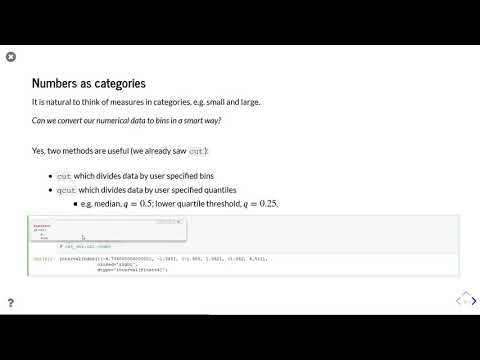

In [10]:
YouTubeVideo('qGAYwb8NHPE', width=640, height=360)

> **Ex. 4.3.2:** 
Convert the `area` column to a categorical variable. 
Transform the `obs_value` column from a continuous to a categorical variable by partitioning it into `3` intervals. Call this new column for `obs_value_cat`.  This can be done using the `pd.cut()` or the `pd.qcut()` methods of pandas. 
Make another column with  `obs_value` as a categorical variable but this time label the 3 intervals as `["cold", "medium", "hot"]`. This can be done by specifying the `labels` parameter in the `pd.cut()` or the `pd.qcut()` methods of pandas. Call this new column for `obs_value_cat_labeled`.

In [11]:
### BEGIN SOLUTION
df['area'] = df['area'].astype('category')
df['obs_value_cat'] = pd.qcut(df['obs_value'], q=[0,.2,.8,1])
df['obs_value_cat_labeled'] = pd.qcut(df['obs_value'], q=[0,.1,.9,1], labels=["cold", "medium", "hot"])
### END SOLUTION

df

,station,datetime,obs_type,obs_value,area,obs_value_cat,obs_value_cat_labeled
0,AGE00135039,18630102,TMAX,11.5,AGE,"(8.9, 23.3]",medium
1,AGE00135039,18630103,TMAX,11.0,AGE,"(8.9, 23.3]",medium
2,AGE00135039,18630105,TMAX,15.5,AGE,"(8.9, 23.3]",medium
3,AGE00135039,18630106,TMAX,16.5,AGE,"(8.9, 23.3]",medium
4,AGE00135039,18630107,TMAX,15.0,AGE,"(8.9, 23.3]",medium
...,...,...,...,...,...,...,...
5875,USW00014838,18630727,TMAX,20.6,USW,"(8.9, 23.3]",medium
5876,USW00014838,18630728,TMAX,19.9,USW,"(8.9, 23.3]",medium
5877,USW00014838,18630729,TMAX,25.1,USW,"(23.3, 49.4]",medium
5878,USW00014838,18630730,TMAX,29.4,USW,"(23.3, 49.4]",hot


## Temporal data

Our coverage of basic Python did not include time. This is another elementary datatypes, that has its own native structure or maybe converted to an integer using a smart method. See more below.

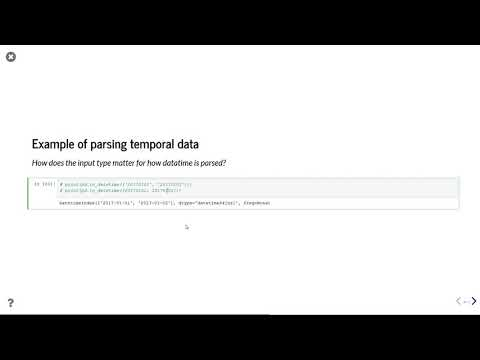

In [12]:
YouTubeVideo('BGnxa6mT94g', width=640, height=360)

> **Ex. 4.3.3:** Convert the date formatted as string to datetime. Call this column `datetime_dt`. Make a new column named `month` with the month for each observation. Set the datetime variable as temporal index. 

> Hint: Look up `.set_index()` setting the index.

In [13]:
### BEGIN SOLUTION
df['datetime_dt'] = pd.to_datetime(df['datetime'], format = '%Y%m%d')

df['month'] = df['datetime_dt'].dt.month

df.set_index(df['datetime_dt'], drop=True)
### END SOLUTION

,station,datetime,obs_type,obs_value,area,obs_value_cat,obs_value_cat_labeled,datetime_dt,month
datetime_dt,,,,,,,,,
1863-01-02,AGE00135039,18630102,TMAX,11.5,AGE,"(8.9, 23.3]",medium,1863-01-02,1
1863-01-03,AGE00135039,18630103,TMAX,11.0,AGE,"(8.9, 23.3]",medium,1863-01-03,1
1863-01-05,AGE00135039,18630105,TMAX,15.5,AGE,"(8.9, 23.3]",medium,1863-01-05,1
1863-01-06,AGE00135039,18630106,TMAX,16.5,AGE,"(8.9, 23.3]",medium,1863-01-06,1
1863-01-07,AGE00135039,18630107,TMAX,15.0,AGE,"(8.9, 23.3]",medium,1863-01-07,1
...,...,...,...,...,...,...,...,...,...
1863-07-27,USW00014838,18630727,TMAX,20.6,USW,"(8.9, 23.3]",medium,1863-07-27,7
1863-07-28,USW00014838,18630728,TMAX,19.9,USW,"(8.9, 23.3]",medium,1863-07-28,7
1863-07-29,USW00014838,18630729,TMAX,25.1,USW,"(23.3, 49.4]",medium,1863-07-29,7


> **Ex. 4.3.4:** Update your annotated function above with processing of area and temporal data.          

In [14]:
### BEGIN SOLUTION

import pandas as pd # Import pandas package

def load_weather(year):
    
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"

    # Load the data
    df_weather = pd.read_csv(url, header=None)\
                             .iloc[:,:4]
    
    # Structure and clean data using methods chaining
    df = df_weather\
                .rename(columns = {0: 'station', 1: 'datetime', 2: 'obs_type', 3: 'obs_value'})\
                .query("obs_type == 'TMAX'")\
                .assign(obs_value = lambda df: df['obs_value']/10)\
                .sort_values(by=['station', 'datetime'])\
                .reset_index(drop=True)\
                .copy()
    
    # Get area codes from 2-3 first characters in station id
    pattern = r'[0-9]'
    df['area'] = df['station'].str[:3].replace('\d+', '').astype('category')

    # Generate temperature categories
    df['obs_value_cat'] = pd.qcut(df['obs_value'], q=[0,.2,.8,1])
    df['obs_value_cat_labeled'] = pd.qcut(df['obs_value'], q=[0,.2,.8,1], labels=["cold", "medium", "hot"])
    
    # Generate time stamp and make index
    df['datetime_dt'] = pd.to_datetime(df['datetime'], format = '%Y%m%d')
    df['month'] = df['datetime_dt'].dt.month
    df.set_index(df['datetime_dt'], drop=True, inplace=True)
    df.drop('datetime_dt',axis='columns', inplace=True)
    
    return df

### END SOLUTION

> **Ex. 4.3.5:** Make a timeseries plot for the stations called `AGE00135039`.

> _Hint:_ for this you need to know a few methods of the pandas Series objects. `.plot()`. 

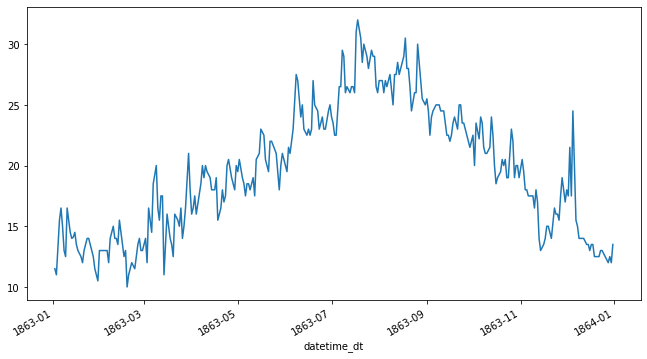

In [15]:
### BEGIN SOLUTION
load_weather(1863).query('station=="AGE00135039"').obs_value.plot(figsize=[11,6])
plt.show()
### END SOLUTION

# Session 3

##  Working with US census data

In this section we will use [this dataset](https://archive.ics.uci.edu/ml/datasets/Adult) from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.html) to practice some basic operations on pandas dataframes. 


> **Ex. 4.2.1:** This link `'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'` leads to a comma-separated file with income data from a US census. Load the data into a pandas dataframe and show the 25th to 35th row.

> _Hint 1:_ There are no column names in the dataset. Use the list `['age','workclass', 'fnlwgt', 'educ', 'educ_num', 'marital_status', 'occupation','relationship', 'race', 'sex','capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage']` as names. 

> _Hint 2:_ When you read in the csv, you might find that pandas includes whitespace in all of the cells. To get around this include the argument `skipinitialspace = True` to `read_csv()`. 

In [16]:
### BEGIN SOLUTION
url = f'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

labels = ['age','workclass', 'fnlwgt', 'educ', 'educ_num', 'marital_status', 'occupation','relationship', 'race', 'sex','capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage']

df_census = pd.read_csv(url, header=None, skipinitialspace = True, names=labels)
df_census.iloc[24:35]
### END SOLUTION

,age,workclass,fnlwgt,educ,educ_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage
24,59,Private,109015,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
26,19,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K
29,49,Private,193366,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30,23,Local-gov,190709,Assoc-acdm,12,Never-married,Protective-serv,Not-in-family,White,Male,0,0,52,United-States,<=50K
31,20,Private,266015,Some-college,10,Never-married,Sales,Own-child,Black,Male,0,0,44,United-States,<=50K
32,45,Private,386940,Bachelors,13,Divorced,Exec-managerial,Own-child,White,Male,0,1408,40,United-States,<=50K
33,30,Federal-gov,59951,Some-college,10,Married-civ-spouse,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K


##  Missing data

Often our data having information missing, e.g. one row lacks data on education for a specific person. Watch the video below about missing data type and get some simple tools to deal with the problem.

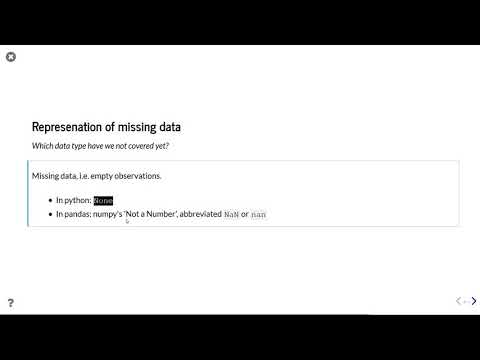

In [17]:
YouTubeVideo('GDaxQig-qCU', width=640, height=360)

> **Ex. 4.2.2:** What is the missing value sign in this dataset? Replace all missing values with NA's understood by pandas. Then proceed to drop all rows containing any missing values with the `dropna` method. How many rows are removed in this operation?

> _Hint 1:_ if this doesn't work as expected you might want to take a look at the hint for 4.2.1 again.
 
> _Hint 2:_ The NaN method from NumPy might be useful

In [18]:
from numpy import NaN

### BEGIN SOLUTION
df_census_new = df_census.replace('?', NaN).dropna()
print(f"We have dropped {len(df_census) - len(df_census_new)} rows")
print(f"This amounts to {round((len(df_census) - len(df_census_new))/len(df_census)*100,2)} % of the rows")
### END SOLUTION

We have dropped 2399 rows
This amounts to 7.37 % of the rows


##  Duplicated data

Watch the video below about duplicated data - in particular duplicated rows and how to handle them.

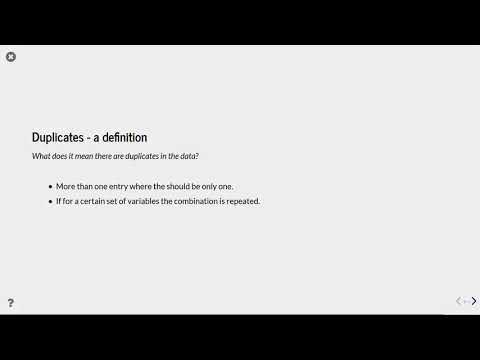

In [19]:
YouTubeVideo('BLLQofon9Ug', width=640, height=360)

> **Ex. 4.2.3:** Determine whether or not duplicated rows is a problem in the NOAA weather data and the US census data in the module. You should come up with arguments from the structure of the rows. 

In [20]:
### BEGIN SOLUTION
print(f"The share of duplicate observations in the weather data is {round((len(load_weather(1863)) - len(load_weather(1863).drop_duplicates(['station','datetime'])))/len(load_weather(1863))*100,2)} %")
print(f"The share of duplicate observations in the US census data is {round((len(df_census_new) - len(df_census_new.drop_duplicates()))/len(df_census_new)*100,2)} %")
### END SOLUTION

The share of duplicate observations in the weather data is 0.0 %
The share of duplicate observations in the US census data is 0.08 %


##  Overview of data types

Watch the summary on data types in pandas below.

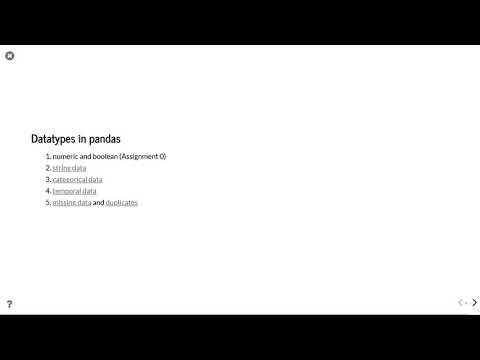

In [21]:
YouTubeVideo('mohBV7crmsU', width=640, height=360)

##  Additional exercises

> **_Note_**: to solve the bonus exercises below, you will need to apply the `.groupby()` method a few times. This has not yet been covered in the lectures (you will see it in on of the next lectures).  
>
> `.groupby()` is a method of pandas dataframes, meaning we can call it like so: `data.groupby('colname')`. The method groups your dataset by a specified column, and applies any following changes within each of these groups. For a more detailed explanation see [this link](https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm). The [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) might also be useful.


> **Ex. 4.2.4:** (_Bonus_) Is there any evidence of a gender-wage-gap in the data? Create a table showing the percentage of men and women earning more than 50K a year.

In [22]:
### BEGIN SOLUTION
df_census_new['HighWage'] = (df_census_new['wage'] == '>50K').astype(int)
df_census_new[['sex', 'HighWage']].groupby('sex').mean()
### END SOLUTION

,HighWage
sex,
Female,0.113678
Male,0.313837


> **Ex. 4.2.5:** (_Bonus_) Group the data by years of education (`educ_num`) and marital status. Now plot the share of individuals who earn more than 50K for the two groups 'Divorced' and 'Married-civ-spouse' (normal marriage). Your final result should look like this: 

![](examplefig.png)

> _Hint:_ remember the `.query()` method is extremely useful for filtering data.

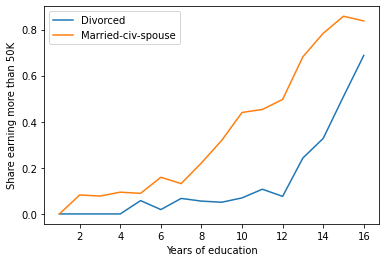

In [23]:
### BEGIN SOLUTION
df_census_new[['marital_status', 'HighWage', 'educ_num']]\
        .groupby(['marital_status', 'educ_num'])\
        .mean()\
        .reset_index()\
        .query("marital_status == 'Divorced' | marital_status == 'Married-civ-spouse'")\
        .set_index('educ_num')\
        .groupby('marital_status')\
        .HighWage\
        .plot()

plt.xlabel('Years of education')
plt.ylabel('Share earning more than 50K')
plt.legend()
### END SOLUTION

# Videos and Exercises for Session 2B: Data Structuring - Aggregation and Joining

In this combined teaching module and exercise set you will be working with how to aggregating and joining different datasets.

The exercises will continue the work with weather data we started working on in the previous set of exercises. We will also study a dataset of traffic data from Copenhagen to iterate through the pandas workflow once more. 

## Packages
Load in the required modules and set up the plotting library:

In [24]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl

# Increases the plot size a little
mpl.rcParams['figure.figsize'] = 11, 6

%matplotlib inline 

### We are not done with pandas (yet!)
This is the final session on using pandas. We will cover the exciting methods for aggregation and working on parts of the data as well as combining different datasets. See the intro video and brief recap video below.

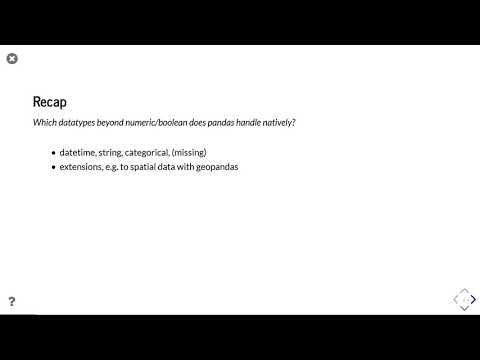

In [25]:
from IPython.display import YouTubeVideo
YouTubeVideo('KB_nSpQRPS8', width=640, height=360)

# Joining datasets
### How to combine two or more dataframes into one
Below we hear about how different datasets can be combined into one, by merging on overlapping information that exists in both datasets. If you want to know more then you can look up Chapter 8, section 8.2 in Python for Data Analysis, 2ed.

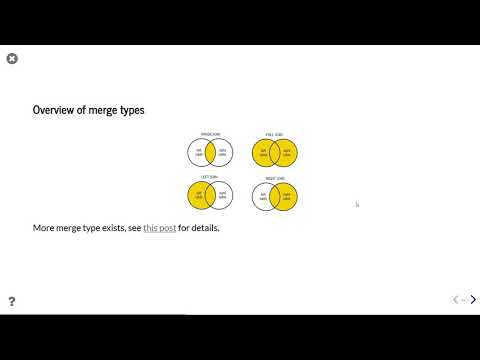

In [26]:
YouTubeVideo('JrCKDbmWGgM', width=640, height=360)

## Exercises on weather data - final part
We continue with the final part of three exercises on structuring weather data. Use the function for fetching and structuring weather data that you used in part 2 of this exercise (i.e. exercise section 4.1).



> **Ex. 5.1.1:** Get the processed data from years 1870-1875 as a list of DataFrames. Generate a variable that denotes the year that the observations belong to. Convert the list into a single DataFrame by concatenating vertically. 

In [29]:
### BEGIN SOLUTION
my_list = []
for year in range(1870,1876):
    df = load_weather(year)
    df['year'] = year
    my_list.append(df)

df_weather = pd.concat(my_list, axis=0)
### END SOLUTION

# Split-apply-combine
### A framework for processing data in parts
Often we need to process information for a given individual, point in time etc. Instead of writing a loop over all the subsets of the data, we can use a more clever approach. Below we introduce the split-apply-combine framework and show how we can leverage it in pandas. If you want to know more then you can look up Chapter 10 in Python for Data Analysis, 2ed.

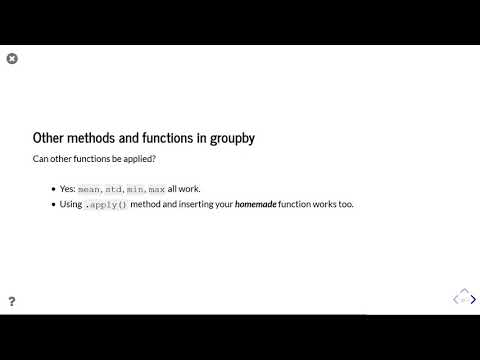

In [28]:
YouTubeVideo('khSWRMPqATQ', width=640, height=360)

> **Ex. 5.1.2:** Compute the mean maximum daily temperature for each month-year pair. 

In [31]:
### BEGIN SOLUTION
split_var=['year', 'month']
apply_var='obs_value'
df_weather.groupby(split_var)[apply_var].mean()
### END SOLUTION

year  month
1870  1         5.982523
      2         4.906687
      3         7.379320
      4        15.375378
      5        19.669082
                 ...    
1875  8        23.942298
      9        19.874226
      10       13.572853
      11        6.811028
      12        4.893091
Name: obs_value, Length: 72, dtype: float64

> **Ex. 5.1.3:** Plot the monthly max,min, mean, first and third quartiles for maximum temperature for our station with the ID _'ITE00100550'_ for the years 1870-1875. 

> *Hint*: the method `describe` computes all these measures.

<AxesSubplot:xlabel='year,month'>

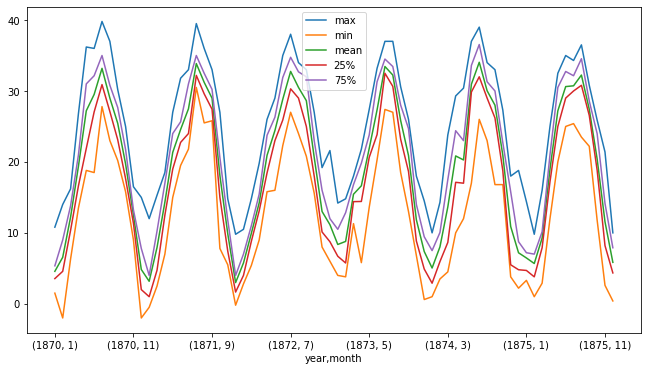

In [44]:
### BEGIN SOLUTION
split_var = ['year', 'month']
apply_var = 'obs_value'
types = ['max', 'min', 'mean', '25%', '75%']
df_weather[df_weather['station']=='ITE00100550'].groupby(split_var)[apply_var].describe()[types].plot(figsize=(11,6))
### END SOLUTION

> **Ex. 5.1.4:** Parse the station location data which you can find at https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt. Merge station locations onto the weather data spanning 1870-1875.  

> _Hint:_ The location data have the folllowing format, 

```
------------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
LATITUDE     13-20   Real
LONGITUDE    22-30   Real
ELEVATION    32-37   Real
STATE        39-40   Character
NAME         42-71   Character
GSN FLAG     73-75   Character
HCN/CRN FLAG 77-79   Character
WMO ID       81-85   Character
------------------------------
```

> *Hint*: The station information has *fixed width format* - does there exist a pandas reader for that? Here Google might be helpful!

In [56]:
### BEGIN SOLUTION
url = f'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt'
labels = ['station', 'latitude', 'longitude', 'elevation', 'state', 'name', 'gsn flag', 'hcn/crn flag', 'wmo id']

df_location = pd.read_fwf(url, header=None, names = labels)

df_weather_new = pd.merge(df_weather, df_location, on='station', how='left')
### END SOLUTION

# Reshaping  dataframes

Often we have data that comes in a format that does not fit our purpose. If you want to know more then you can look up Chapter 8, section 8.3 in Python for Data Analysis, 2ed.

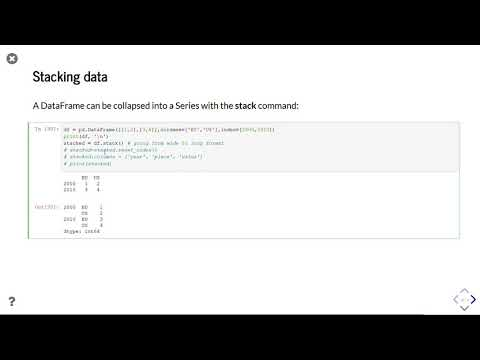

In [55]:
YouTubeVideo('kJO85WOXNEU', width=640, height=360)

> **Ex. 5.1.5:** For which months was the temperature in general colder in 1870 vs. 1875?

> *Hint: you may use `unstack`.


In [66]:
### BEGIN SOLUTION
split_var = ['year', 'month']
apply_var = 'obs_value'
types = ['mean']

yearly_data = df_weather.groupby(split_var)[apply_var].describe()[types].unstack()

for month in range(0,12):
    if yearly_data.iloc[0,month]>yearly_data.iloc[5,month]:
        print(f"In month {month+1}, it was warmer in 1870 than in 1875")
    else:
        print(f"In month {month+1}, it was warmer in 1875 than in 1870")
### END SOLUTION

In month 1, it was warmer in 1870 than in 1875
In month 2, it was warmer in 1870 than in 1875
In month 3, it was warmer in 1870 than in 1875
In month 4, it was warmer in 1870 than in 1875
In month 5, it was warmer in 1870 than in 1875
In month 6, it was warmer in 1870 than in 1875
In month 7, it was warmer in 1870 than in 1875
In month 8, it was warmer in 1875 than in 1870
In month 9, it was warmer in 1870 than in 1875
In month 10, it was warmer in 1870 than in 1875
In month 11, it was warmer in 1870 than in 1875
In month 12, it was warmer in 1870 than in 1875


# Summary and beyond pandas

We round off this lecture with a brief summary of the most important points. I also review some packages that you can look at, which allows you to scale up your data analysis.

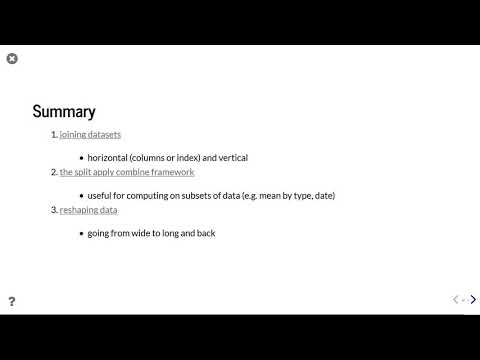

In [67]:
YouTubeVideo('CKg3MjnhVlg', width=640, height=360)

## More practice: Traffic data in Copenhagen

In this second part set of exercises you will be working with traffic data from Copenhagen Municipality.

The municipality have made the data openly available through the [opendata.dk](http://www.opendata.dk/) platform. We will use the data from traffic counters to construct a dataset of hourly traffic. We will use this data to get basic insights on the development in traffic over time and relate it to weather. The gist here is to practice a very important skill in Data Science: being able to quickly fetch data from the web and structure it so that you can work with it. Scraping usually gets a bit more advanced than what we will do today, but the following exercises should give you a taste for how it works. The bulk of these exercise, however, revolve around using the Pandas library to structure and analyze data.

### Part 5.2.a: getting some data to work with

Hence follows a simple scraping exercise where you (1) collect urls for datasets in the webpage listing data on traffic counters and (2) use these urls to load the data into one dataframe.

> **Ex. 5.2.1:** Using the requests module, extract the html markup of the webpage data.kk.dk/dataset/faste-trafiktaellinger and store it as a string in a new variable.

In [1]:
### BEGIN SOLUTION
from requests import get 

url = 'https://www.opendata.dk/city-of-copenhagen/faste-trafiktaellinger'
resp = get(url)

html = resp.text
### END SOLUTION

> **Ex. 5.2.2:** Using the re module, extract a list of all the urls in the html string and store them in a new variable.

> _Hint:_ Try using the re.findall method. You may want to Google around to figure out how to do this. Searching for something along the lines of "extract all links in html regex python" and hitting the first StackOverflow link will probably get you farther than reading elaborate documentation.

In [17]:
import re 

### BEGIN SOLUTION
rehits = re.findall(r'href=[\'"]?([^\'" >]+)', html)
### END SOLUTION

> **Ex. 5.2.3:** Create a new variable `datalinks` that only contains the links that point to downloadable traffic data sheets. Some links may be preset more than once on the page. To get the unique links use the `set()` function on `datalinks`.

> _Hint:_ You want to filter the results from above. For example to only include urls with the term 'download' in them.

In [168]:
### BEGIN SOLUTION
datalinks = set([url for url in rehits if 'download' in url])
### END SOLUTION

> **Ex. 5.2.4:** Using pd.read_excel method, load the datasets into a list. Your resulting variable should hold a list of Pandas dataframes.

> _Hint:_ you may want to set the `skiprows` keyword argument. 

In [171]:
### BEGIN SOLUTION
traffic_raw = [pd.read_excel(url, skiprows = 10) for url in datalinks]
### END SOLUTION

> **Ex. 5.2.5:** Merge the list of dataframes into a single dataframe.

In [217]:
### BEGIN SOLUTION
final_data = pd.concat(traffic_raw)
final_data
### END SOLUTION

,Vej-Id,Vejnavn,Spor,(UTM32),(UTM32).1,Dato,kl.00-01,kl.01-02,kl.02-03,kl.03-04,...,kl.14-15,kl.15-16,kl.16-17,kl.17-18,kl.18-19,kl.19-20,kl.20-21,kl.21-22,kl.22-23,kl.23-24
0,101 1011492-0 1/ 124 -,Ellebjergvej,NaN,720881,6172777,01.01.2012,223.0,388.0,332.0,271.0,...,686.0,712.0,617.0,613.0,544.0,410.0,311.0,259.0,226.0,155.0
1,101 1011492-0 1/ 124 -,Ellebjergvej,NaN,720881,6172777,02.01.2012,73.0,49.0,46.0,76.0,...,955.0,1120.0,1178.0,933.0,654.0,502.0,380.0,307.0,271.0,168.0
2,101 1011492-0 1/ 124 -,Ellebjergvej,NaN,720881,6172777,03.01.2012,69.0,55.0,45.0,90.0,...,991.0,1090.0,1090.0,1071.0,707.0,498.0,478.0,360.0,295.0,186.0
3,101 1011492-0 1/ 124 -,Ellebjergvej,NaN,720881,6172777,04.01.2012,86.0,46.0,60.0,90.0,...,966.0,1182.0,1319.0,1021.0,748.0,589.0,432.0,348.0,295.0,170.0
4,101 1011492-0 1/ 124 -,Ellebjergvej,NaN,720881,6172777,05.01.2012,88.0,48.0,62.0,87.0,...,1067.0,1246.0,1260.0,966.0,785.0,576.0,452.0,380.0,347.0,196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18477,101 1018636-0 0/ 180 T,Åboulevard,NaN,723530,6176573,27.12.2006,1185.0,363.0,290.0,262.0,...,2953.0,3059.0,3034.0,2607.0,2133.0,1570.0,1427.0,1235.0,1214.0,928.0
18478,101 1018636-0 0/ 180 T,Åboulevard,NaN,723530,6176573,28.12.2006,1247.0,457.0,365.0,332.0,...,2997.0,3225.0,3054.0,2880.0,2326.0,1808.0,1498.0,1374.0,1366.0,1077.0
18479,101 1018636-0 0/ 180 T,Åboulevard,NaN,723530,6176573,29.12.2006,1376.0,487.0,402.0,363.0,...,3255.0,3472.0,3182.0,3001.0,2584.0,1942.0,1694.0,1436.0,1374.0,1323.0
18480,101 1018636-0 0/ 180 T,Åboulevard,NaN,723530,6176573,30.12.2006,1607.0,711.0,620.0,592.0,...,2641.0,2357.0,2233.0,2403.0,1990.0,1519.0,1330.0,1186.0,1210.0,1127.0


### Part 5.2.b Structuring your data

If you successfully completed the previous part, you should now have a dataframe with about 183.397 rows (if your number of rows is close but not the same, worry not—it matters little in the following). Well done! But the data is still in no shape for analysis, so we must clean it up a little.

161.236 rows (and 30 columns) is a lot of data. ~3.3 MB by my back-of-the-envelope calculations, so not "Big Data", but still enough to make your CPU heat up if you don't use it carefully. Pandas is built to handle fairly large dataframes and has advanced functionality to perform very fast operations even when the size of your data grows huge. So instead of working with basic Python we recommend working pandas built-in procedures as they are constructed to be fast on dataframes.

Nerd fact: the reason pandas is much faster than pure Python is that dataframes access a lower level programming languages (namely C, C++) which are multiple times faster than Python. The reason it is faster is that it has a higher level of explicitness and thus is more difficult to learn and navigate.

> **Ex. 5.2.6:** Reset the row indices of your dataframe so the first index is 0 and the last is whatever the number of rows your dataframe has. Also drop the column named 'index' and the one named `Spor`.

In [174]:
### BEGIN SOLUTION
final_data = final_data\
        .reset_index()\
        .drop(['index', 'Spor'], axis = 1)
### END SOLUTION

> **Ex. 5.2.7:** Rename variables from Danish to English using the dictionary below.

```python 
dk_to_uk = {
    'Vejnavn':'road_name',
    '(UTM32)':'UTM32_north',
    '(UTM32).1':'UTM32_east',
    'Dato':'date',
    'Vej-Id':'road_id'
}
```

In [175]:
### BEGIN SOLUTION
dk_to_uk = {
    'Vejnavn':'road_name',
    '(UTM32)':'UTM32_north',
    '(UTM32).1':'UTM32_east',
    'Dato':'date',
    'Vej-Id':'road_id'
}


final_data = final_data.rename(columns = dk_to_uk)
### END SOLUTION

Python is quite efficient. For example, when you create a new dataframe by manipulating an old one, Python notices that—apart from some minor changes—these two objects are almost the same. Since memory is a precious resource, Python will represent the values in the new dataframe as references to the variables in the old dataset. This is great for performance, but if you for whatever reason change some of the values in your old dataframe, values in the new one will also change—and we don't want that! Luckily, we can break this dependency.

> **Ex. 5.2.8:** Break the dependencies of the dataframe that resulted from Ex. 5.2.7 using the `.copy` method. Delete all other dataframes.

In [176]:
### BEGIN SOLUTION
new_data = final_data.copy()

del final_data
### END SOLUTION

Once you have structured appropriately, something that you will want to do again and again is selecting subsets of the data. Specifically, it means that you select specific rows in the dataset based on some column values.

>**Ex. 5.2.9:** Create a new column in the dataframe called total that is True when the last letter of road_id is T and otherwise False.

> _Hint:_ you will need the `pd.Series.str` attribute for this.

In [178]:
### BEGIN SOLUTION
new_data['total'] = (new_data.road_id.str[-1] == 'T')
### END SOLUTION

> **Ex. 5.2.10:** Select rows where total is True. Delete all the remaining observations.

In [180]:
### BEGIN SOLUTION
total_data = new_data[new_data.total == True]

del new_data
### END SOLUTION

> **Ex. 5.2.11:** Make two datasets based on the lists of columns below. Call the dataset with spatial columns data_geo and the other data.

```python
# Columns for `geo_data`, stored in `geo_columns`
spatial_columns = ['road_name', 'UTM32_north', 'UTM32_east']

# Columns for `data`, stored in `select_columns`
hours = ['kl.{}-{}'.format(str(h).zfill(2), str(h+1).zfill(2)) for h in range(24)]
select_columns = ['road_name', 'date'] + hours
```

In [182]:
### BEGIN SOLUTION
# Columns for `geo_data`, stored in `geo_columns`
spatial_columns = ['road_name', 'UTM32_north', 'UTM32_east']

# Columns for `data`, stored in `select_columns`
hours = [f'kl.{str(h).zfill(2)}-{str(h+1).zfill(2)}' for h in range(24)]
select_columns = ['road_name', 'date'] + hours

# selections
data_geo = total_data[spatial_columns]
data  = total_data[select_columns]

del total_data
### END SOLUTION

> **Ex. 5.2.12:** Drop the duplicate rows in data_geo.

In [184]:
### BEGIN SOLUTION
data_geo.drop_duplicates(inplace = True)
### END SOLUTION

**Formatting: wide and narrow format**

When talking about two-dimensional data (matrices, tables or dataframes, we can call it many things), we can either say that it is in wide or long format (see explanation here, "wide" and "long" are used interchangably). In Pandas we can use the commands stack and unstack to move between these formats.

The wide format has the advantage that it often requires less storage and is easier to read when printed. On the other hand the long format can be easier for modelling, because each observation has its own row. Turns out that the latter is what we most often need.

> **Ex. 5.2.13:** Turn the dataset from wide to long so hourly data is now vertically stacked. Store this dataset in a dataframe called data. Name the column with hourly information hour_period. Your resulting dataframe should look something like this.

> _Hint:_ pandas' melt function may be of use.

In [186]:
### BEGIN SOLUTION

# A bonus info: This function is written using optional type declaration. This
# is used to communicate what type the inputs should be. It doesn't affect the 
# functionality in any way, but it can sometimes increase readability. 

def gather(df: pd.DataFrame, key: str, value: str, cols: list) -> pd.DataFrame:
    """ This helper makes pythons melt() behave like R's gather()
    """
    id_vars = [ col for col in df.columns if col not in cols ]
    id_values = cols
    var_name = key
    value_name = value
    return pd.melt( df, id_vars, id_values, var_name, value_name )

data_long = gather(data, 'hour_period', 'value', hours)

# # using .stack() 
# # dropna = False in stack() is necessary for the dataframe to be exactly equal to the one above
# data_long = data.set_index(["road_name", "date"])\
#                 .stack(dropna=False)\
#                 .reset_index()\
#                 .rename(columns = {"level_2": "hour_period", 0: "value"})

### END SOLUTION

**Categorical data**

Categorical data can contain Python objects, usually strings. These are smart if you have variables with string observations that are long and often repeated, e.g. with road names.

> **Ex. 5.2.14:** Use the `.astype` method to convert the type of the road_name column to categorical.

In [188]:
### BEGIN SOLUTION
data_long.road_name = data_long.road_name.astype('category')
### END SOLUTION

### Structure temporal data

Pandas has native support for working with temporal data. This is handy as much 'big data' often has time stamps which we can make Pandas aware of. Once we have encoded temporal data it can be used to extract information such as the hour, second etc.

> **Ex. 5.2.15:** Create a new column called hour which contains the hour-of-day for each row. 

In [190]:
### BEGIN SOLUTION
data_long['hour'] = pd.to_datetime(data_long['hour_period'].str[3:5], format = '%H')
### END SOLUTION

>**Ex. 5.2.16:** Create a new column called time, that contains the time of the row in datetime format. Delete the old temporal columns (hour, hour_period, date) to save memory.

> _Hint:_ try making an intermediary series of strings that has all temporal information for the row; then use pandas to_datetime function where you can specify the format of the date string.

In [192]:
### BEGIN SOLUTION
data_long['timestamp'] = pd.to_datetime(data_long.date + ' ' + data_long.hour\
                                                                        .dt\
                                                                        .hour\
                                                                        .astype(str)\
                                                                        .apply(lambda x: x.zfill(2)),
                                        format = '%d.%m.%Y %H')

data_long = data_long.drop(['hour', 'hour_period', 'date'], axis = 1)
### END SOLUTION

> **Ex. 5.2.17:** Using your time column make a new column called weekday which stores the weekday (in values between 0 and 6) of the corresponding datetime.

> _Hint:_ try using the dt method for the series called time; dt has some relevant methods itself.

In [194]:
### BEGIN SOLUTION
data_long['weekday'] = data_long.timestamp.dt.weekday

### Statistical descriptions of traffic data

> **Ex. 5.2.18:** Print the "descriptive statistics" of the traffic column. Also show a kernel density estimate of the values.

> _Hint:_ Use the describe method of pandas dataframes for the first task. Use seaborn for the second. 

count    1.433632e+06
mean     7.527278e+02
std      8.231834e+02
min      0.000000e+00
25%      1.310000e+02
50%      4.120000e+02
75%      1.154000e+03
max      1.065800e+04
Name: value, dtype: float64


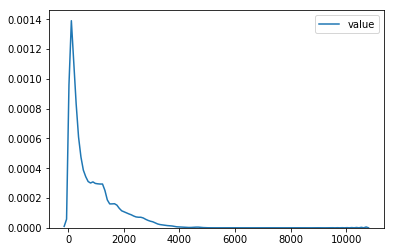

In [196]:
import seaborn as sb

### BEGIN SOLUTION
print(data_long.value.describe())

sb.kdeplot(data_long.value.dropna())
plt.show()
### END SOLUTION

> **Ex. 5.2.19:** Which road has the most average traffic?

In [198]:
### BEGIN SOLUTION
data_long.groupby('road_name')\
         .value.agg('mean')\
         .reset_index()\
         .sort_values('value', ascending = False)\
         .head(10)
### END SOLUTION

,road_name,value
20,Åboulevard,1832.535007
5,Hareskovvej,1781.348144
2,Fredensbro,1615.688439
12,Roskildevej,1547.680620
9,Kalvebod Brygge,1459.062771
0,Ellebjergvej,1423.814049
15,Torvegade,1174.389343
16,Tuborgvej,1155.902472
18,Vigerslev Allé,876.440934
7,Jagtvej,832.859514


> **Ex. 5.2.20:** Compute annual, average road traffic during day hours (9-17). Which station had the least traffic in 2013? Which station has seen highest growth in traffic from 2013 to 2014?

In [199]:
### BEGIN SOLUTION
# create year variable
data_long['year'] = data_long.timestamp.dt.year
data_long['hour'] = data_long.timestamp.dt.hour

# subset relevant years and times 
data_delta = data_long.query("year == 2013 | year == 2014")\
                      .query("hour >= 9 & hour <= 17")

# convert to wide format
data_delta = data_delta[['road_name', 'value', 'year']].groupby(['road_name', 'year'])\
                                                       .agg('mean')\
                                                       .reset_index()\

# create year variable
data_long['year'] = data_long.timestamp.dt.year
data_long['hour'] = data_long.timestamp.dt.hour

# subset relevant years and times 
data_delta = data_long.query("year == 2013 | year == 2014")\
                      .query("hour >= 9 & hour <= 17")

# convert to wide format
data_delta = data_delta[['road_name', 'value', 'year']].groupby(['road_name', 'year'])\
                                                       .agg('mean')\
                                                       .reset_index()\
                                                       .pivot('road_name', 'year', 'value')\
                                                       .reset_index()
# remove redundant column name after pivoting 
data_delta.columns.name = None

# calculate relative size
data_delta['growth'] = (data_delta[2014]/data_delta[2013] - 1)*100

# show
data_delta.sort_values('growth', ascending = False)
### END SOLUTION